In [2]:
"""
Feature extraction from the datasets
Author: Kai Li Ong & Danial Haris
"""

from pprint import pprint
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [3]:
image_folder = "resources\\Kamm"
list = os.listdir(image_folder)
number_files = len(list)
print(number_files)
images_list = []
valid_images = [".jpg",".png"]
for f in os.listdir(image_folder):
    images_list.append(os.path.join(image_folder,f))

400


In [4]:
image_path = "C:\\Users\\KylieOng\\Videos\\Trainingsbild\\lida_onka_trainingsbilder\\Kamm2\\image_2.png"
image = cv2.imread(image_path)
img_copy = image.copy()
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Dark Image


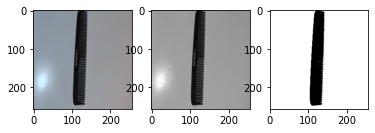

In [11]:
dark_bright_threshold = 200
mean_of_gray_image = np.mean(img_gray)

# Select threshold for further operation based on image brightness
if mean_of_gray_image < dark_bright_threshold:
    # Image is dark
    contour_recognition_threshold = 120
    print("Dark Image")
else:
    # Image is bright
    contour_recognition_threshold = 200
    print("Light Image")

_, img_thresh = cv2.threshold(img_gray, contour_recognition_threshold, 255, cv2.THRESH_BINARY)

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(img_gray, "gray")
plt.subplot(1, 3, 3)
plt.imshow(img_thresh,  "gray")

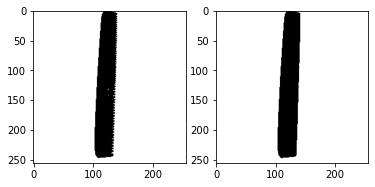

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(img_thresh,  "gray")
kernel = np.ones((3,3), np.uint8)
img_thresh = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.subplot(1, 2, 2)
plt.imshow(img_thresh, "gray")

57228.5


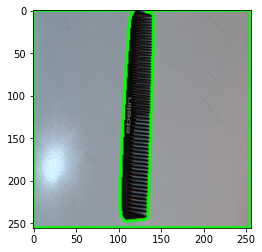

In [13]:
contours, _ = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.cv2.CHAIN_APPROX_NONE)

i = 0
for cnt in contours:
    print(cv2.contourArea(cnt))
    im = img_copy.copy()
    cv2.drawContours(im, cnt, -1, (0, 255, 0), 2, cv2.LINE_AA)
    plt.subplot(1, len(contours), i+1)
    plt.imshow(im, "gray")
    i = i + 1

Area 57228.5


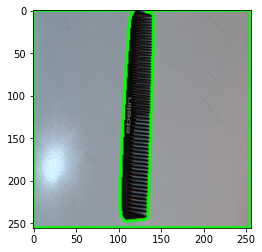

In [14]:
# get greatest contour by area
im_boundary = (img_thresh.shape[0]-1)*(img_thresh.shape[1]-1)
areas = [cv2.contourArea(ar) for ar in contours]
cnt = [x for x in areas if x!=im_boundary]
cnt = contours[areas.index(max(cnt))]
contour_area = cv2.contourArea(cnt)
print("Area", contour_area)

to_show_contour = img_copy.copy()
cv2.drawContours(to_show_contour, cnt, -1, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(to_show_contour)

Rectangle 255.0 255.0


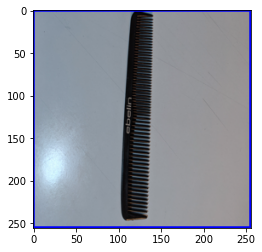

In [15]:
rect = cv2.minAreaRect(cnt)
rect_area = rect[1][0] * rect[1][1]
box = cv2.boxPoints(rect)
box = np.int0(box)
print("Rectangle", rect[1][0], rect[1][1])
to_show_box = img_copy.copy()
cv2.drawContours(to_show_box, [box], 0, (0, 0, 255), 2)
plt.imshow(to_show_box)

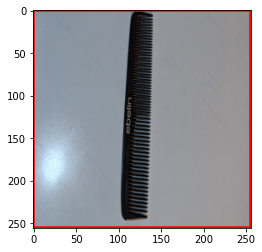

In [16]:
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
to_show_hull = img_copy.copy()
cv2.drawContours(to_show_hull, [hull], 0, (255, 0, 0), 2)
plt.imshow(to_show_hull)

good corners 39


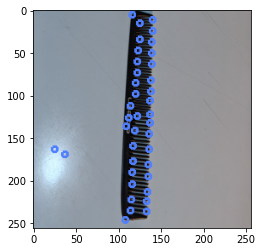

In [17]:
# Detect corners from grayscale image
corners = cv2.goodFeaturesToTrack(np.float32(img_gray), 100, 0.01, 10)
corners = np.int0(corners)
to_show_corners = img_copy.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(to_show_corners, (x, y), 3, (80, 127, 255), 2)
plt.imshow(to_show_corners)
print("good corners", len(corners))

In [18]:
def corner_harist(img, src_img):
    gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    new_im = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.uint8)
    new_im[dst > 0.01 * dst.max()] = 1
    # Threshold for an optimal value, it may vary depending on the image.
    img[dst > 0.01 * dst.max()] = [0, 0, 255]
    # cv.imshow("inimage", img)
    return new_im

harris corners 558


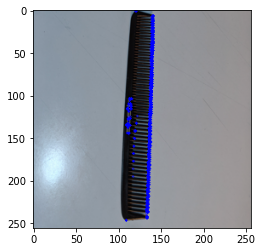

In [19]:
h_corners = cv2.cornerHarris(np.float32(img_gray),  2, 3, 0.04)
h_corners = np.int0(h_corners)
to_show_corners_harris = img_copy.copy()
h_threshold = 0.05
for i in range(h_corners.shape[0]):
    for j in range(h_corners.shape[1]):
        if h_corners[i, j] > h_corners.max()*h_threshold:
            cv2.circle(to_show_corners_harris, (j, i), 1, (0, 0, 255), 1)
plt.imshow(to_show_corners_harris)
amount_h_corners = len(h_corners[h_corners > h_corners.max()*h_threshold])
print("harris corners", amount_h_corners)

In [20]:
# Store features as dictionary
ret = {
    "id": 0,
    "contour_points": len(cnt),
    "amount_contours": len(contours),
    "contour_length_area_ratio": (
            cv2.arcLength(cnt, True) / contour_area
    ),
    "contour_length_rect_area_ratio": cv2.arcLength(cnt, True) / rect_area,
    "contour_length_hull_area_ratio": cv2.arcLength(cnt, True) / hull_area,
    "contour_rect_length_ratio": (
            cv2.arcLength(cnt, True) / (2 * (rect[1][0] + rect[1][1]))
    ),
    "contour_hull_length_ratio": (
        cv2.arcLength(cnt, True) / cv2.arcLength(hull, True)
    ),
    "extent": contour_area / rect_area,
    "solidity": contour_area / hull_area,
    "aspect_ratio": rect[1][0] / rect[1][1],
    "hull_rectangle_ratio": hull_area / rect_area,
    "corners": len(corners),
    "harris_corners" : amount_h_corners
}
print(ret)

{'id': 0, 'contour_points': 1529, 'amount_contours': 1, 'contour_length_area_ratio': 0.026999734887138832, 'contour_length_rect_area_ratio': 0.023762465636118793, 'contour_length_hull_area_ratio': 0.023762465636118793, 'contour_rect_length_ratio': 1.514857184302573, 'contour_hull_length_ratio': 1.514857184302573, 'extent': 0.8800999615532488, 'solidity': 0.8800999615532488, 'aspect_ratio': 1.0, 'hull_rectangle_ratio': 1.0, 'corners': 39, 'harris_corners': 558}
